In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def normalize(data):
  mean = data.describe().loc["mean"]
  std = data.describe().loc["std"]
  data = (data - mean) / std
  return data

In [ ]:
path = "/content/IE440Final24ClusteringData.txt"
df = pd.read_csv(path, sep = "\t")
data = df.copy()
data[['x', "y"]] = normalize(data[["x", "y"]])

In [ ]:
def visualize(cluster_centers = None, points=data):
  plt.figure(figsize=(8, 6))
  for cls in points.Class.unique():
    class_set = points[points['Class'] == cls]
    plt.scatter(class_set['x'], class_set['y'], alpha=0.7)
  if cluster_centers is not None:
    plt.scatter(cluster_centers[0], cluster_centers[1], s=50, marker="s", c="k", label="Cluster Centers")
    K = len(cluster_centers.T)
    plt.title(f"K = {K}")
    plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

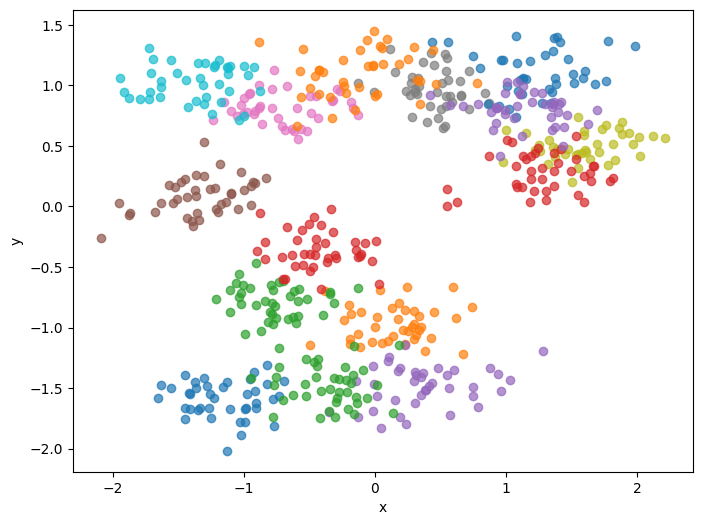

In [ ]:
visualize();

 Experiment for K = 5, 10 and 15 clusters.
 Run K-means 10 000 times after initializing cluster centers randomly for K = 5,10, 15 and
 plot the data and the best cluster centers found in 10 000 trials.

In [ ]:
def k_means(data, I):

  # number of patterns
  P = len(data)
  X = data[["x", "y"]].to_numpy()
  # random weight initialization
  w = np.random.random(size=(I, 2))
  # z0 set to positive infinity
  z_previous = float("inf")
  t = 0

  while True:

    b = np.zeros((I, P))

    for p in range(P):
      norm_list = []
      for i in range(I):
        norm = LA.norm(X[p] - w[i])
        norm_list.append(norm)
      ip = np.argmin(norm_list)
      b[ip][p]= 1

    z = 0
    for p in range(P):
      for i in range(I):
        d = np.sum(X[p] - w[i])
        z += b[i][p] * (d)**2

    for i in range(I):
      for k in range(2):
        numerator = 0
        denominator = 0
        for p in range(P):
          numerator += np.sum(b[i][p] * X[p][k])
          denominator += np.sum(b[i][p])

        if (denominator == 0):
          continue

        w[i][k] = numerator / denominator
    if z > z_previous:
      break
    z_previous = z
  return b, w, z



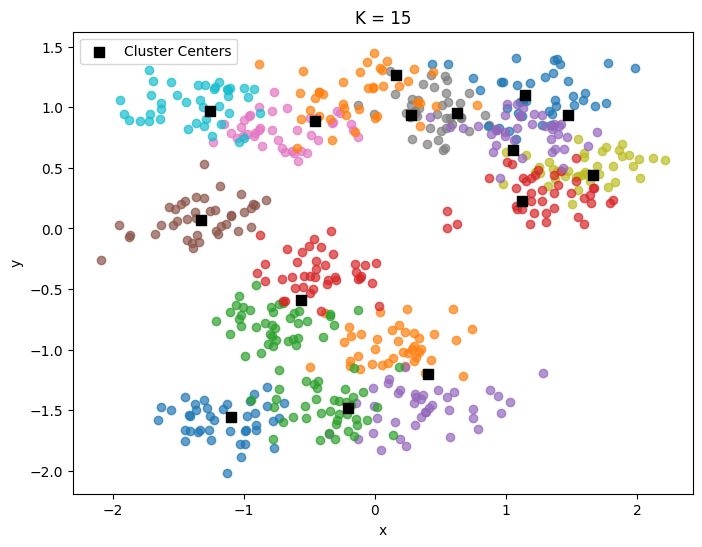

59.92114708316306

In [ ]:
b_k, w_k, z_k = k_means(data, 15)
visualize(cluster_centers = w_k.T)
z_k

In [ ]:
results = pd.DataFrame(columns=["K", "w", "z"])
results["K"] = np.array([5, 10, 15])
results.set_index("K", inplace=True)

for k in [5, 10, 15]:
  z = float("inf")
  for _ in range(10000):
    b_k, w_k, z_k = k_means(data, k)
    if z_k < z:
      z = z_k
      results.loc[k] = [w_k, z_k]

results["z"]

,z
K,
5,163.121316
10,69.345673
15,45.221565


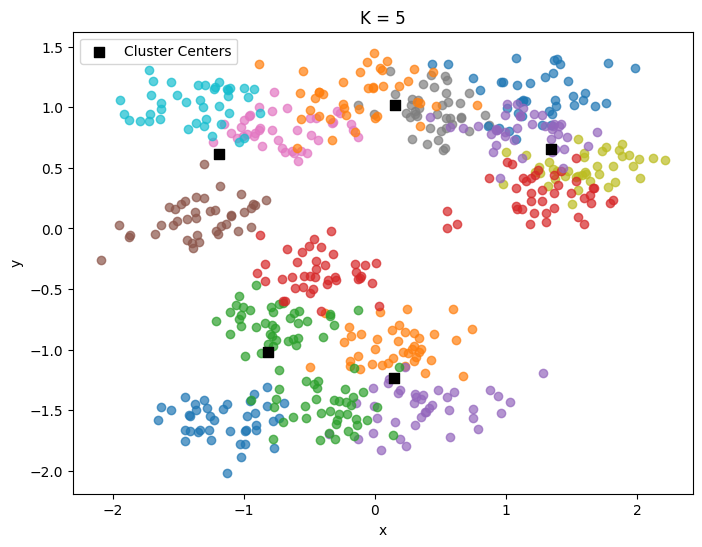

In [ ]:
visualize(cluster_centers = results.loc[5]["w"].T)

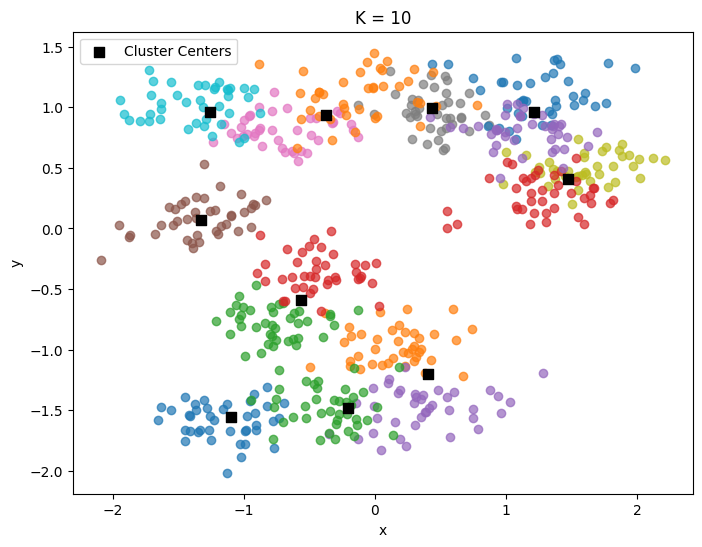

In [ ]:
visualize(cluster_centers = results.loc[10]["w"].T)

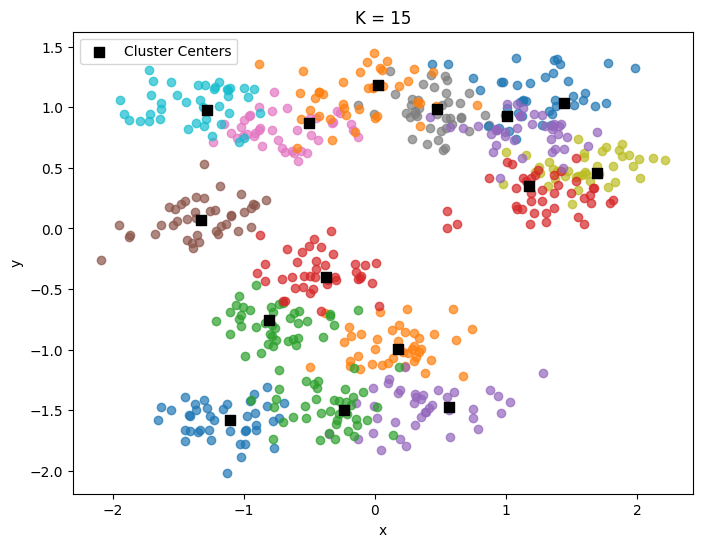

In [ ]:
visualize(cluster_centers = results.loc[15]["w"].T)

In [ ]:
results.loc[15]["w"]

array([[-1.10442898, -1.5779039 ],
       [-0.23725299, -1.50050437],
       [-0.810867  , -0.75642686],
       [-1.324621  ,  0.06862635],
       [ 0.56073895, -1.47263841],
       [ 1.00640682,  0.92473457],
       [ 1.69122445,  0.45767005],
       [ 1.17062795,  0.35199226],
       [-1.28219198,  0.97509481],
       [ 0.17598917, -0.99388287],
       [ 0.46998472,  0.98466396],
       [ 1.43841879,  1.03647527],
       [-0.50246855,  0.86956302],
       [ 0.02324393,  1.18653321],
       [-0.37008933, -0.3970746 ]])

z:  182.81377295932438


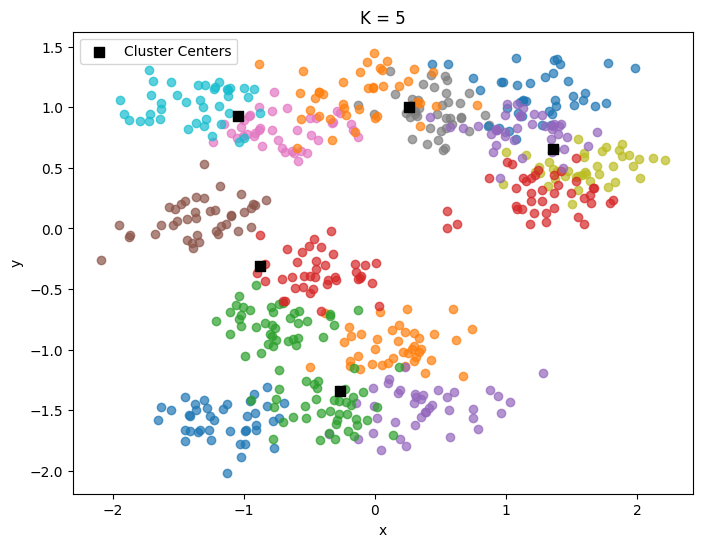

z:  86.78030467650166


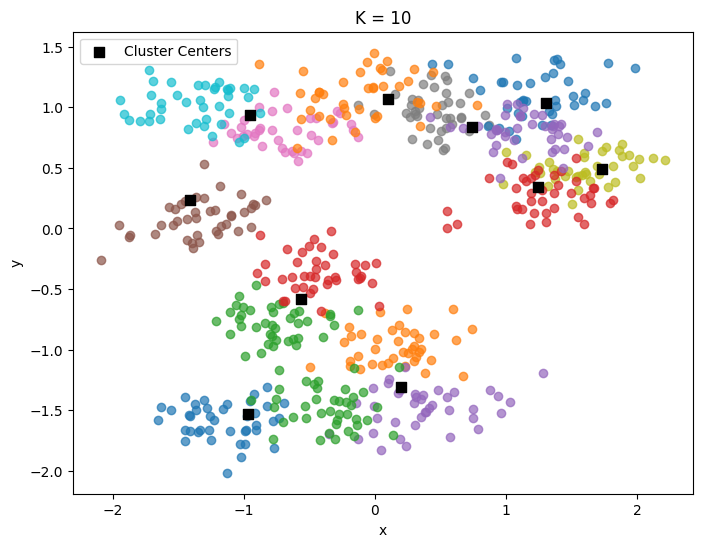

z:  49.33356166042998


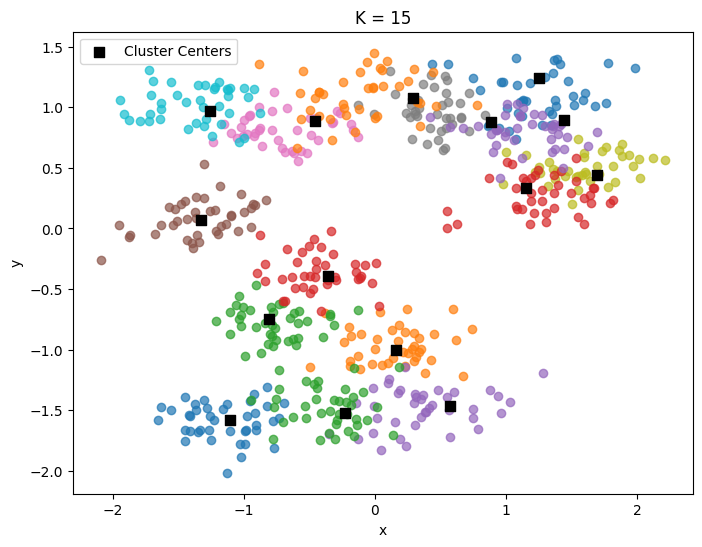

In [ ]:
b_k, w_k, z_k = k_means(data, 5)
print("z: ", z_k)
visualize(cluster_centers = w_k.T)
b_k, w_k, z_k = k_means(data, 10)
print("z: ", z_k)
visualize(cluster_centers = w_k.T)
b_k, w_k, z_k = k_means(data, 15)
print("z: ", z_k)
visualize(cluster_centers = w_k.T)